In [1]:
import os
import sys
from dotenv import load_dotenv
load_dotenv
sys.path.append(os.getenv('UTILS_PATH'))

import pandas as pd


In [2]:
INPUT_DIR = os.getenv('INPUT_DIR')
OUTPUT_DIR = os.getenv('OUTPUT_DIR')

In [3]:
articles = pd.read_csv(INPUT_DIR + 'articles.csv', dtype='object')
customers = pd.read_csv(INPUT_DIR + 'customers.csv')
transactions = pd.read_csv(INPUT_DIR + 'transactions_train.csv', dtype={'customer_id':'str'}, parse_dates=['t_dat'])
sample = pd.read_csv(INPUT_DIR + 'sample_submission.csv')

# transactionsとsubでのcustomerの重複具合

In [4]:
sample.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [5]:
sample.shape

(1371980, 2)

In [6]:
sample['customer_id'].value_counts()

00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    1
aaabd1b7c85e6139d6c80addf788b1fde89f52dd71edabfeef699117078ca7d1    1
aaabafd8f1490fb3cb830f363c766568b8c53e8daf938e7262ebc58ac1417a09    1
aaabad72467637cd672a021d2699c2bfb02736cdf53d64e8f3385b623cf9dd1e    1
aaab82bd88837ce6490c66c82954aa1e6d59ca1ae6afcb87a86065cfcf96fb70    1
                                                                   ..
557716a29afd925a80a972134bf6f63fb24943ed1cd33e33850578d429f05189    1
55771330f2fc1075c0a65181ddc963dd0630c61cc51180414195d9f18d4e584b    1
557707059a44632a572fc1cb5676c5f874d27924b28bedfd016c78a36a4b6a40    1
557705fcf5be9236da875c5546485cc96d607dc9fec13506ae3a5182eeb66931    1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241    1
Name: customer_id, Length: 1371980, dtype: int64

In [7]:
transactions_customer_id = transactions['customer_id'].unique()
sub_customer_id = sample['customer_id'].unique()

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns

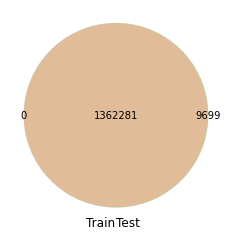

In [10]:
s1 = set(transactions_customer_id.tolist())
s2 = set(sub_customer_id.tolist())
venn2(subsets=[s1, s2], set_labels=['Train', 'Test'])

In [12]:
print(len(transactions_customer_id))
print(len(sub_customer_id))

1362281
1371980


In [14]:
1 - len(transactions_customer_id) / len(sub_customer_id)

0.007069345034184216

In [15]:
s1 - s2

set()

In [16]:
articles['article_id']

0         0108775015
1         0108775044
2         0108775051
3         0110065001
4         0110065002
             ...    
105537    0953450001
105538    0953763001
105539    0956217002
105540    0957375001
105541    0959461001
Name: article_id, Length: 105542, dtype: object